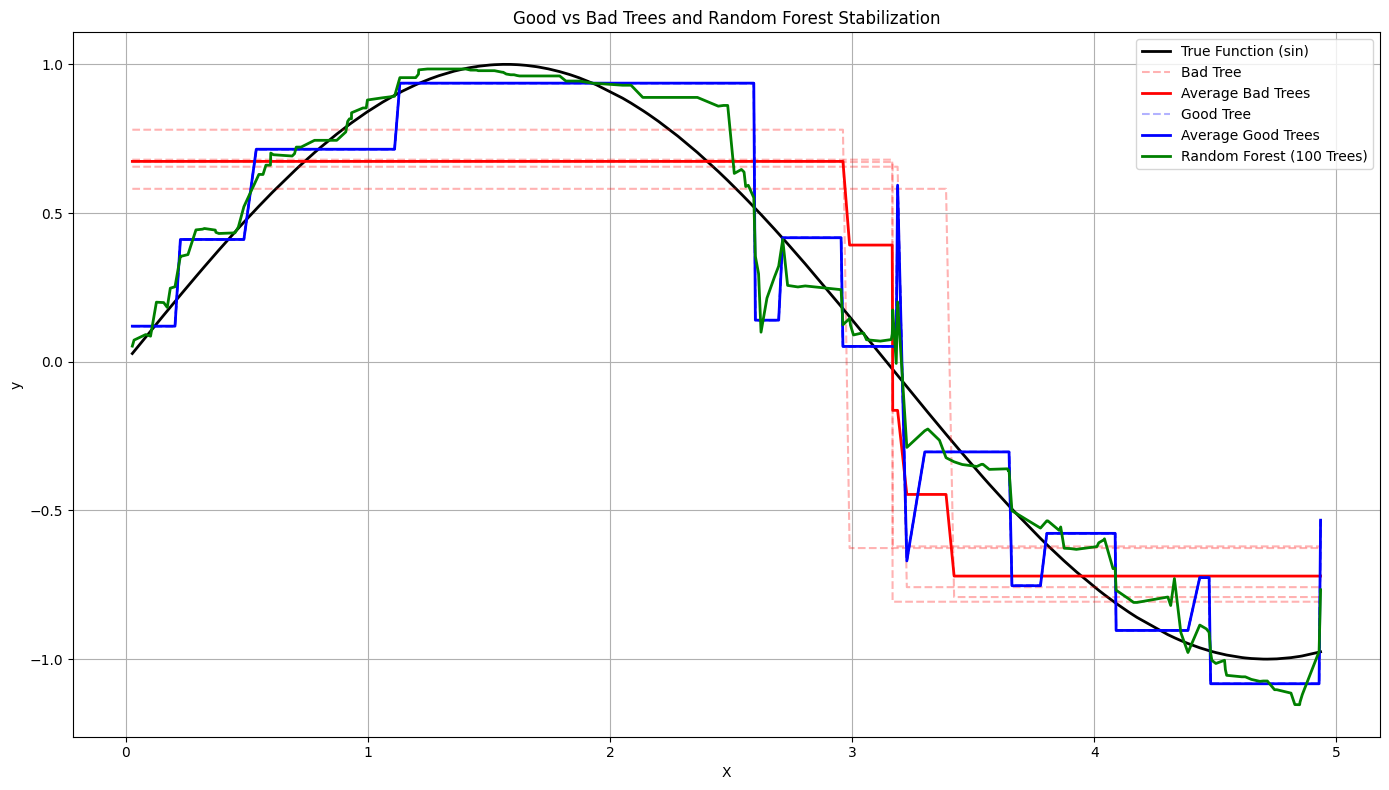

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Generate a synthetic dataset
n_samples = 200
X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
y_true_func = np.sin(X).ravel()
noise = np.random.normal(0, 0.3, size=y_true_func.shape)
y = y_true_func + noise

# Create a few "bad" decision trees (overfit or noisy ones)
bad_trees = [DecisionTreeRegressor(max_depth=1).fit(X, y + np.random.normal(0, 0.5, size=y.shape)) for _ in range(5)]
bad_preds = [tree.predict(X) for tree in bad_trees]
avg_bad_pred = np.mean(bad_preds, axis=0)

# Create a few "good" decision trees (fit reasonably well)
good_trees = [DecisionTreeRegressor(max_depth=4).fit(X, y) for _ in range(5)]
good_preds = [tree.predict(X) for tree in good_trees]
avg_good_pred = np.mean(good_preds, axis=0)

# Create a Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
rf.fit(X, y)
rf_pred = rf.predict(X)

# Plot everything
plt.figure(figsize=(14, 8))

# Plot true function
plt.plot(X, y_true_func, label="True Function (sin)", color='black', linewidth=2)

# Plot individual bad trees
for i, pred in enumerate(bad_preds):
    plt.plot(X, pred, color='red', alpha=0.3, linestyle='--', label='Bad Tree' if i == 0 else None)

# Plot average of bad trees
plt.plot(X, avg_bad_pred, label='Average Bad Trees', color='red', linewidth=2)

# Plot individual good trees
for i, pred in enumerate(good_preds):
    plt.plot(X, pred, color='blue', alpha=0.3, linestyle='--', label='Good Tree' if i == 0 else None)

# Plot average of good trees
plt.plot(X, avg_good_pred, label='Average Good Trees', color='blue', linewidth=2)

# Plot Random Forest
plt.plot(X, rf_pred, label='Random Forest (100 Trees)', color='green', linewidth=2)

plt.title("Good vs Bad Trees and Random Forest Stabilization")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 📊 What This Graph Shows

#### ⚫ Black Line → The true function: sin(x), our ground truth.

#### ⭕ Red Dashed Lines → A few “bad” decision trees (very shallow, over-noisy).

#### 🔴 Red Bold Line → Average prediction of the bad trees. Still poor, barely captures the true function.

#### ⏺️ Blue Dashed Lines → A few “good” decision trees (moderate depth, better fit).

#### 🔵 Blue Bold Line → Average of good trees. Much closer to the true function, less noisy.

#### 🟢 Green Line → Random Forest with 100 trees. Very smooth, stable, and closely tracks the true function.

### 🧠 Insight Visualized

#### 1. Bad trees are like weak learners or noise—their average still misses the mark.

#### 2. Good trees, even individually noisy, average out to give a more accurate fit.

#### 3. The Random Forest, by using many trees + bootstrap + feature randomness, amplifies the good, suppresses the noise, and converges to something reliable—just like SLLN.